In [ ]:
!pip3 install xgboost

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
# from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/content/gtzan_features.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,label
0,blues.00024.wav,661500,0.263108,0.099980,0.086962,0.002512,1120.390980,176408.836176,1447.852625,53821.613990,...,94.161580,-2.302590,68.893074,3.783148,76.785670,0.084823,73.574780,-0.939437,126.729645,blues
1,blues.00027.wav,661500,0.288705,0.094162,0.095725,0.002194,1391.443904,200153.143237,1494.850834,43500.503910,...,61.917267,-9.396027,85.992905,-2.562838,107.918915,-4.522896,59.029346,-0.262949,67.838790,blues
2,blues.00074.wav,661500,0.367174,0.085402,0.196903,0.004284,2515.869160,272550.358669,2531.420001,66559.812170,...,85.300290,12.328122,65.853590,-13.717032,65.636055,11.850821,70.903915,-3.982272,58.626965,blues
3,blues.00075.wav,661500,0.466458,0.081497,0.192030,0.008019,2225.176866,462553.522638,2255.135044,99000.271768,...,73.999756,15.339354,75.326546,-7.049362,83.158050,12.182225,61.919407,-6.110912,92.456580,blues
4,blues.00011.wav,661500,0.365807,0.102007,0.065685,0.002501,1353.329119,511903.711272,1757.331004,220219.000176,...,148.787000,6.566734,114.196280,-4.879438,93.832950,-3.180660,84.243774,-5.557003,65.379010,blues


In [ ]:
df.shape

(999, 46)

In [ ]:
df.dtypes

,0
filename,object
length,int64
chroma_stft_mean,float64
chroma_stft_var,float64
rms_mean,float64
rms_var,float64
spectral_centroid_mean,float64
spectral_centroid_var,float64
spectral_bandwidth_mean,float64
spectral_bandwidth_var,float64


In [ ]:
df = df.drop(['filename', 'tempo'], axis=1)
df.shape

(999, 44)

In [ ]:
df = pd.get_dummies(df, columns=['label'])
df.shape

(999, 53)

In [ ]:
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,label_blues,label_classical,label_country,label_disco,label_hiphop,label_jazz,label_metal,label_pop,label_reggae,label_rock
0,661500,0.263108,0.099980,0.086962,0.002512,1120.390980,176408.836176,1447.852625,53821.613990,2325.127607,...,True,False,False,False,False,False,False,False,False,False
1,661500,0.288705,0.094162,0.095725,0.002194,1391.443904,200153.143237,1494.850834,43500.503910,2811.141335,...,True,False,False,False,False,False,False,False,False,False
2,661500,0.367174,0.085402,0.196903,0.004284,2515.869160,272550.358669,2531.420001,66559.812170,5771.615100,...,True,False,False,False,False,False,False,False,False,False
3,661500,0.466458,0.081497,0.192030,0.008019,2225.176866,462553.522638,2255.135044,99000.271768,4703.588225,...,True,False,False,False,False,False,False,False,False,False
4,661500,0.365807,0.102007,0.065685,0.002501,1353.329119,511903.711272,1757.331004,220219.000176,2882.315904,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=df.filter(like='label_').columns)
y = df.filter(like='label_')  # One-hot encoded labels

# Split into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Print shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (749, 43), X_test shape: (250, 43)
y_train shape: (749, 10), y_test shape: (250, 10)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print batch sizes
print(f"Train DataLoader batches: {len(train_loader)}")
print(f"Test DataLoader batches: {len(test_loader)}")

Train DataLoader batches: 24
Test DataLoader batches: 8


In [ ]:
# # Data Visualization
# # Add genre names back for visualization
# df['genre'] = le.inverse_transform(df['label'])

# # Group by genre and compute mean for selected features
# genre_means = df.groupby('genre').mean()

# # Features to visualize
# features_to_plot = ['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean', 'tempo']

# # Plot bar charts
# plt.figure(figsize=(15, 10))
# for i, feature in enumerate(features_to_plot, 1):
#     plt.subplot(2, 2, i)
#     genre_means[feature].plot(kind='bar')
#     plt.title(f'Mean {feature} by Genre')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
# plt.show()

# # Drop the temporary 'genre' column
# df = df.drop('genre', axis=1)

In [ ]:
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        # self.softmax = nn.Softmax(dim=1)  # Softmax for probability outputs
        # self.relu3 = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        # out = self.softmax(out)  # Apply Softmax to final logits
        # out = self.relu3(out)
        return out

best lr = 1e-3

In [ ]:
# Define Hyperparameters
input_size = X_train.shape[1]  # 44 features
hidden_size1 = 256
hidden_size2 = 128
num_classes = 10  # 10 genres
learning_rate = 0.0005
num_epochs = 175

# Initialize the model
model = ANN(input_size, hidden_size1, hidden_size2, num_classes)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(f"Hyperparameters set. Using device: {device}")

Hyperparameters set. Using device: cpu


In [ ]:
train_losses = []
val_losses = []
clip_value = 1.0  # Set a reasonable clipping value

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        # Apply gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip_value)

        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # # Validation phase
    # model.eval()
    # val_loss = 0.0
    # with torch.no_grad():
    #     for inputs, labels in val_loader:
    #         inputs, labels = inputs.to(device), labels.to(device)
    #         outputs = model(inputs)
    #         loss = criterion(outputs, labels)
    #         val_loss += loss.item()

    # val_loss /= len(val_loader)
    # val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}")

Epoch [1/175], Train Loss: 2.1496
Epoch [2/175], Train Loss: 1.7415
Epoch [3/175], Train Loss: 1.4271
Epoch [4/175], Train Loss: 1.2084
Epoch [5/175], Train Loss: 1.0944
Epoch [6/175], Train Loss: 0.9898
Epoch [7/175], Train Loss: 0.9142
Epoch [8/175], Train Loss: 0.8457
Epoch [9/175], Train Loss: 0.7839
Epoch [10/175], Train Loss: 0.7361
Epoch [11/175], Train Loss: 0.6827
Epoch [12/175], Train Loss: 0.6538
Epoch [13/175], Train Loss: 0.6105
Epoch [14/175], Train Loss: 0.5845
Epoch [15/175], Train Loss: 0.5533
Epoch [16/175], Train Loss: 0.5297
Epoch [17/175], Train Loss: 0.5071
Epoch [18/175], Train Loss: 0.4687
Epoch [19/175], Train Loss: 0.4523
Epoch [20/175], Train Loss: 0.4366
Epoch [21/175], Train Loss: 0.4042
Epoch [22/175], Train Loss: 0.3963
Epoch [23/175], Train Loss: 0.3854
Epoch [24/175], Train Loss: 0.3529
Epoch [25/175], Train Loss: 0.3362
Epoch [26/175], Train Loss: 0.3224
Epoch [27/175], Train Loss: 0.3048
Epoch [28/175], Train Loss: 0.3052
Epoch [29/175], Train Loss: 0

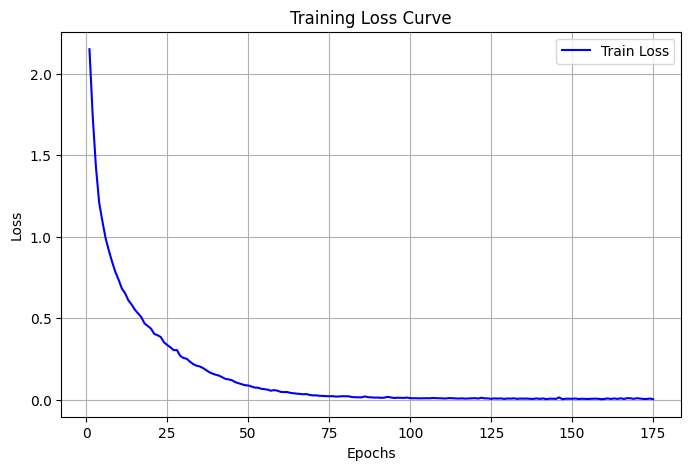

Test Accuracy: 0.7520
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.68      0.77        25
           1       0.83      0.80      0.82        25
           2       0.83      0.80      0.82        25
           3       0.62      0.64      0.63        25
           4       0.73      0.88      0.80        25
           5       0.76      0.88      0.81        25
           6       0.91      0.84      0.88        25
           7       0.91      0.80      0.85        25
           8       0.60      0.60      0.60        25
           9       0.54      0.60      0.57        25

    accuracy                           0.75       250
   macro avg       0.76      0.75      0.75       250
weighted avg       0.76      0.75      0.75       250



In [ ]:
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report

# Plot Training Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss", color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid()
plt.show()

# Model Evaluation
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        predictions = torch.argmax(F.softmax(outputs, dim=1), dim=1)  # Convert logits to class predictions
        y_true.extend(torch.argmax(labels, dim=1).cpu().numpy())  # Convert one-hot labels to class indices
        y_pred.extend(predictions.cpu().numpy())

# Compute Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))